In [14]:
from pathlib import Path
import yaml

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [15]:
with Path("../Data/HE1327-2326.yml").open() as file:
    he13272326 = yaml.load(file, Loader=yaml.FullLoader)

In [16]:
with Path("../Data/elements.yml").open() as file:
    elements_names = yaml.load(file, Loader=yaml.FullLoader)

In [17]:
with Path("../Data/Asplund.yml").open() as file:
    asplund = yaml.load(file, Loader=yaml.FullLoader)

KeyError: 'star'

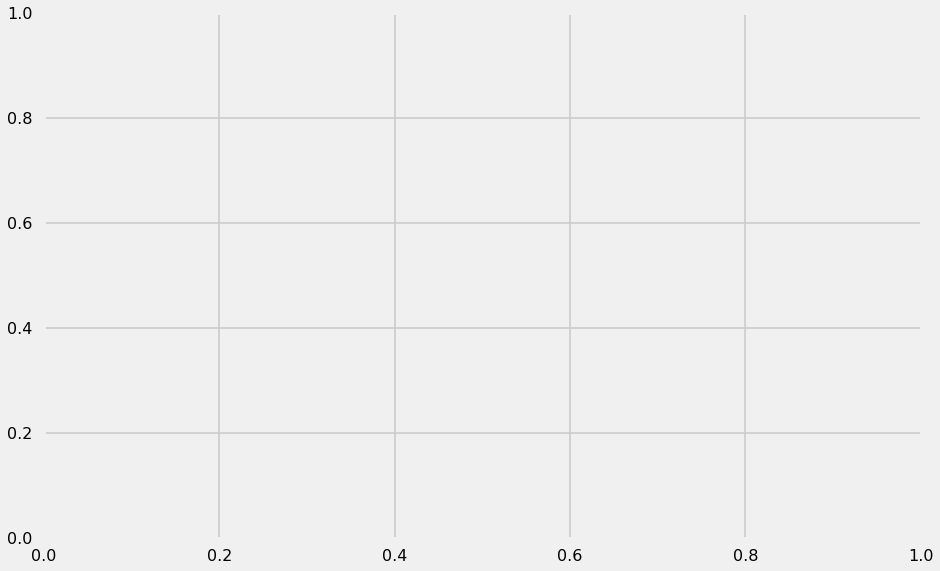

In [18]:
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(1,1,1)

elements = []
zs = []
abundances = []
uncert = []


for element, abundance in asplund.items():
    
    elements.append(element)
    #ax.text(elements_names['charge_numbers'][element]-0.4, abundance+0.3, element)
    
    zs.append(elements_names['charge_numbers'][element])
    abundances.append(float(abundance[0]))
    uncert.append(float(abundance[1]))
    
ax.errorbar(zs, abundances, uncert, fmt='.')
fig.legend()
ax.set_xlabel('Z')
ax.set_ylabel('');


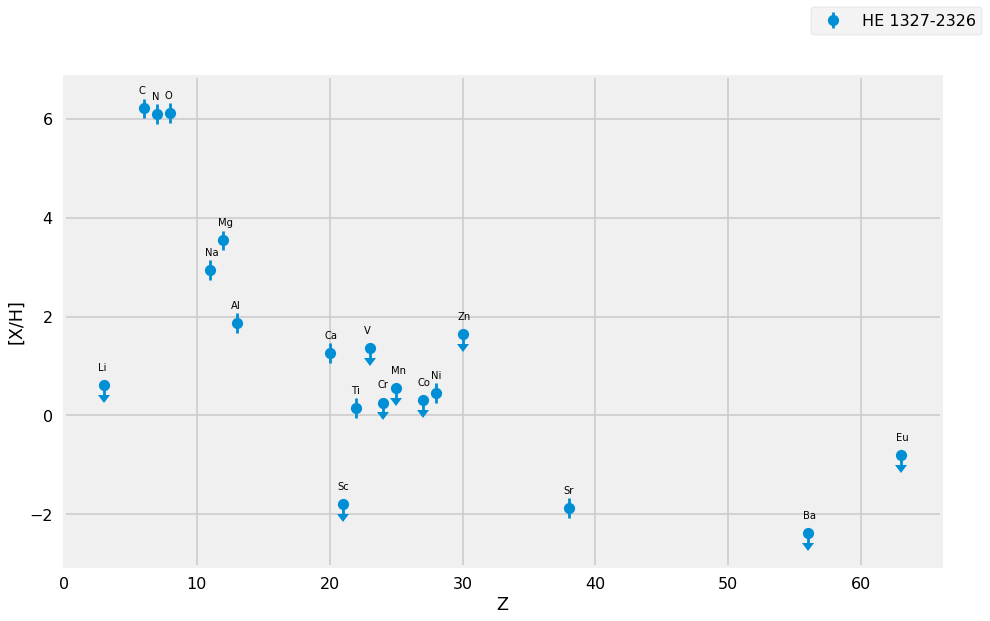

In [12]:
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(1,1,1)

elements = []
zs = []
abundances = []
upperlimits = []


for element, abundance in he13272326['Abundance']['loge'].items():
    
    el = element.split('(')
    
    if 'UL)' in el:
        upperlimits.append(True)
    else:
        upperlimits.append(False)
    
    
    elements.append(el[0])
    ax.text(elements_names['charge_numbers'][el[0]]-0.4, abundance+0.3, el[0])
    
    zs.append(elements_names['charge_numbers'][el[0]])
    abundances.append(float(abundance))
    
    
ax.errorbar(zs, abundances, 0.2, uplims=upperlimits, fmt='o', label=he13272326['Star'])
fig.legend()
ax.set_xlabel('Z')
ax.set_ylabel('[X/H]');
